# Working Notebook

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import seaborn as sns
import math
import re
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pytz
from pytz import timezone
import datetime
import time
import collections
from wordcloud import WordCloud
import settings
import mysql.connector
import itertools
import os 
import psycopg2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly
import random
import plotly.express as px
from IPython.display import clear_output
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
py.init_notebook_mode()

In [2]:
# Dictionary of US State names used for in constructing map
STATES = ['Alabama', 'AL', 'Alaska', 'AK', 'American Samoa', 'AS', 'Arizona', 'AZ', 'Arkansas', 'AR', 'California', 'CA', 'Colorado', 'CO', 'Connecticut', 'CT', 'Delaware', 'DE', 'District of Columbia', 'DC', 'Federated States of Micronesia', 'FM', 'Florida', 'FL', 'Georgia', 'GA', 'Guam', 'GU', 'Hawaii', 'HI', 'Idaho', 'ID', 'Illinois', 'IL', 'Indiana', 'IN', 'Iowa', 'IA', 'Kansas', 'KS', 'Kentucky', 'KY', 'Louisiana', 'LA', 'Maine', 'ME', 'Marshall Islands', 'MH', 'Maryland', 'MD', 'Massachusetts', 'MA', 'Michigan', 'MI', 'Minnesota', 'MN', 'Mississippi', 'MS', 'Missouri', 'MO', 'Montana', 'MT', 'Nebraska', 'NE', 'Nevada', 'NV', 'New Hampshire', 'NH', 'New Jersey', 'NJ', 'New Mexico', 'NM', 'New York', 'NY', 'North Carolina', 'NC', 'North Dakota', 'ND', 'Northern Mariana Islands', 'MP', 'Ohio', 'OH', 'Oklahoma', 'OK', 'Oregon', 'OR', 'Palau', 'PW', 'Pennsylvania', 'PA', 'Puerto Rico', 'PR', 'Rhode Island', 'RI', 'South Carolina', 'SC', 'South Dakota', 'SD', 'Tennessee', 'TN', 'Texas', 'TX', 'Utah', 'UT', 'Vermont', 'VT', 'Virgin Islands', 'VI', 'Virginia', 'VA', 'Washington', 'WA', 'West Virginia', 'WV', 'Wisconsin', 'WI', 'Wyoming', 'WY']
STATE_DICT = dict(itertools.zip_longest(*[iter(STATES)] * 2, fillvalue=""))
INV_STATE_DICT = dict((v,k) for k,v in STATE_DICT.items())
pd.options.display.max_colwidth = 200

In [3]:
# Load json data containing tweets
# tweets_data_path = 'elite.json'

# with open(tweets_data_path) as f:
#   tweets_data = json.load(f)
# print("The total number of Tweets is:",len(tweets_data))
# import pprint
# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(tweets_data[0])
# # Convert json to dataframe
# tweets_df = pd.read_json(tweets_data_path, orient='columns')

In [4]:
# Load data from MySQL
# conn = mysql.connector.connect(
#     host="localhost",
#     user="root",
#     passwd="password",
#     database="db",
#     charset = 'utf8'
# )

In [5]:
# Load data from local Postgresql database
# DATABASE_URL = os.environ['DATABASE_URL'] 
# conn = connect(DATABASE_URL)
# conn = psycopg2.connect(DATABASE_URL, sslmode='require')
TABLE_NAME = "dynamite25"
conn = psycopg2.connect(user = "root",
                        password = "",
                        host = "localhost",
                        port = "5432",
                        database = "dbtwitter")

In [6]:
# Uncomment to specific time_start and timedelta in UTC
# time_start = datetime.datetime(2020, 3, 25, hour=23, minute=0, second=0, microsecond=0, tzinfo=pytz.utc)
# timedelta = datetime.timedelta(hours=1, minutes=0, seconds=59)
# time_end = time_start + timedelta

# time_start_str = time_start.strftime('%Y-%m-%d %H:%M:%S')
# time_end_str = time_end.strftime('%Y-%m-%d %H:%M:%S')

# time_start_CST = time_start.astimezone(timezone('US/Central')).strftime('%b %d, %Y %I:%M%p')
# time_end_CST = time_end.astimezone(timezone('US/Central')).strftime('%b %d, %Y %I:%M%p')
# query = "SELECT * FROM {} WHERE created_at >= '{}' AND created_at <= '{}'".format(TABLE_NAME, time_start_str, time_end_str)

In [7]:
# Selects all tweets from specified table
query = "SELECT * FROM {} ".format(TABLE_NAME)

# Run query to get data and read into Pandas DataFrame
tweets_df = pd.read_sql(query, con=conn)

In [8]:
tweets_df.head()

created_at               id_str  \
0 2020-03-25 22:58:10  1242948922328395782   
1 2020-03-25 22:58:18  1242948954938945537   
2 2020-03-25 22:58:22  1242948970118340609   
3 2020-03-25 22:58:22  1242948974056701953   
4 2020-03-25 22:58:39  1242949044596543489   

                                                                                                                                                 text  \
0        RT @devinthe63: Had a blast chatting with @KelDansby  yesterday about his show @CornerPodcast_ ( his cohost @AndreasHale ), working for @es…   
1  RT @AEWrestling: Tomorrow night on Dynamite - @IAmJericho &amp; @MATTHARDYBRAND will meet face to face in a colossal confrontation!\n⁠\nWatch #AE…   
2        RT @MariaLyngPoulse: I’m excited for #aewdynamite💥 #fanart of the vessel of #Damascus @MATTHARDYBRAND #freethedelete #beingtheelite #imwith…   
3        RT @AEWrestling: .@JimmyHavoc comes into tonight’s #AEWDynamite with a  3-0 record, and he’s looking to go 4-0 at the expense of @CodyRhode…   
4                         RT @JsmallSAINTS: We got Matt Hardy &amp; Brodie Lee, I’m personally waiting for these boys in #AEW https://t.co/tNwLmGXyNv   

  in_reply_to       was_retweet_id was_retweet_user        user_name  \
0        None  1242941879592902656       devinthe63      CaptainHYPE   
1        None  1242647563658039298      AEWrestling         BigToy94   
2        None  1242905879965548547  MariaLyngPoulse       Shaunbear3   
3        None  1242925751592275972      AEWrestling    brotherjohn82   
4        None  1242935670349484034     JsmallSAINTS  TouchMyMonkey13   

             user_location  \
0  Hyperbolic Time Chamber   
1              Atlanta, GA   
2            United States   
3  England, United Kingdom   
4                Essex, MD   

                                                                                                                                           user_description  \
0  Married to my soulmate @velaje_xo The Captain of NBA2K. Believer, Husband, Father Gamer #Lakers #Ravens #Yankees #WWE #NJPW #AEW EVERYTHING IS WRESTLING   
1                                                                                                         I am into anything that I like to be on my pages.   
2                                                                                                                                                      None   
3                                                                  horses\nvideo games\ncooking\nnature\nanimals\nwrestling fan\n420 friendly \n\neupd ptsd   
4                                                                         Future husband to Pam Fitzgerald Friend/Fan of @jss98rock @km99rock @dieselbrostv   

          user_created   geo coordinates  user_followers_count  \
0  2011-02-02 04:02:06  None        None                  3901   
1  2016-11-27 12:05:22  None        None                   112   
2  2019-11-25 23:54:51  None        None                   108   
3  2014-12-20 07:02:33  None        None                   277   
4  2012-10-20 06:54:02  None        None                  1306   

   user_friends_count  retweet_count  favorites_count  polarity  subjectivity  
0                1311              0                0       NaN           NaN  
1                1401              0                0       NaN           NaN  
2                 893              0                0       NaN           NaN  
3                 604              0                0       NaN           NaN  
4                4756              0                0       NaN           NaN

In [39]:
tweets_df.tail()

created_at               id_str  \
49158 2020-03-25 18:57:50-05:00  1242963938825863173   
49159 2020-03-25 18:57:50-05:00  1242963937152335872   
49160 2020-03-25 18:57:50-05:00  1242963935420125190   
49161 2020-03-25 18:57:49-05:00  1242963932408676356   
49162 2020-03-25 18:57:49-05:00  1242963931792052224   

                                                                                                                                               text  \
49158  This is the wayyy to watch #AEW with some whiteclaw and my favorite peeps @Howlzzz @ray_ramundo and @TheeSirSinister https://t.co/XjvwcB0x06   
49159  RT @MichaelNakazawa: Fishing is something you can still enjoy while you keep distance from people. Now I have to go home and watch #AEWDyna…   
49160                                                                                       Here we go! 🎉 #AEW #AEWDynamite https://t.co/CVRReI0syU   
49161      RT @RefKrisLevin: Talking about #AEWDynamite on @WrestlingInc is the only booking I have for the foreseeable future. Join me, won’tchya?   
49162                                           @WrestleTalk_TV Cody and Kenny are on commentary tonight for #AEWDynamite think I'm gonna pass lads   

          in_reply_to       was_retweet_id was_retweet_user        user_name  \
49158                                                           Luvs2Dream82   
49159                  1242960400565571588  MichaelNakazawa    aew4lyfesquad   
49160                                                        2HELLWITHMITCH2   
49161                  1242963794969661441     RefKrisLevin     WrestlingInc   
49162  WrestleTalk_TV                                           SimplyRedAEW   

                   user_location  \
49158            Land of Glitter   
49159                              
49160  Turtles Dream, Outerspace   
49161                 Denver, CO   
49162                              

                                                                                                                                                         user_description  \
49158  I am the EVP of Giggles/Heart Break Chic\nHost of Indy talks/Co-host on @AllElitePod for @nhbnetwork.\nOwner of #ListOfHusbands @AnthonyGangone is #Number1Husband   
49159                                                                                                                                     Wrestling Geek. #AEW #ImWithAEW   
49160                                                                       metal, wrestling, and my general idiocy 🧠 DEATH🔺TRIANGLE\n#AEW #JoinDarkOrder #YangGang2024 🔥   
49161                                                                                              Pro Wrestling, WWE, AEW, NJPW, Impact Wrestling and ROH Wrestling News   
49162                                                                                        The plastics are getting purged\n\nManchester United, AEW, and whatever else   

                   user_created geo coordinates  user_followers_count  \
49158 2009-10-18 21:30:10-05:00                                  1313   
49159 2017-07-15 21:58:18-05:00                                   188   
49160 2020-01-13 12:26:30-06:00                                    39   
49161 2009-04-23 12:15:50-05:00                                 82510   
49162 2019-05-05 11:36:21-05:00                                    28   

       user_friends_count  retweet_count  favorites_count polarity  \
49158                 740              1               12      0.5   
49159                 797              7                0      0.4   
49160                 324              0                1        0   
49161                1908              1                0        0   
49162                  92              0                0        0   

      subjectivity  is_retweet  \
49158            1       False   
49159          0.5        True   
49160            0       False   
49161       0.5625        True   
49162     

In [9]:
# Clean columns and replace None with blank
tweets_df['in_reply_to'] = tweets_df['in_reply_to'].apply(lambda i : i or '')
# tweets_df['text'] = tweets_df['text'].apply(lambda text: text.encode('ascii', 'ignore').decode('ascii'))
tweets_df['was_retweet_user'] = tweets_df['was_retweet_user'].apply(lambda i : i or '')
tweets_df['was_retweet_id'] = tweets_df['was_retweet_id'].apply(lambda i : i or '')
# Add column is_retweet 
tweets_df['is_retweet'] = tweets_df['text'].apply(lambda x: False if 'RT' not in x else True)
# Convert created_at and user_created time to CST
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format = '%Y-%m-%d %H:%M:%S', utc=True)
# tweets_df['created_at'] = tweets_df['created_at'].dt.tz_localize('utc')
tweets_df['created_at'] = tweets_df['created_at'].dt.tz_convert('US/Central')
tweets_df['user_created'] = pd.to_datetime(tweets_df['user_created'], format = '%Y-%m-%d %H:%M:%S', utc=True)
# tweets_df['user_created'] = tweets_df['user_created'].dt.tz_localize('utc')
tweets_df['user_created'] = tweets_df['user_created'].dt.tz_convert('US/Central')
tweets_df['text_lower'] = tweets_df['text'].apply(lambda x:x.lower())

In [10]:
AEW_hashtags = ['#AEW', '#AllELiteWrestling', '#AEWDark', '#AEWDynamite', '#AEWonTNT']
WWE_hashtags = ['#WWE','#NXT']

In [11]:
# Compute # of RT's, @'s, and text tweets
retweet_tweets = tweets_df[tweets_df['is_retweet'] == True]
response_tweets = tweets_df[tweets_df['in_reply_to']!='']
mention_tweets = tweets_df[~tweets_df['text'].str.contains("RT")  & tweets_df['text'].str.contains("@")]
mention_tweets = mention_tweets[mention_tweets['in_reply_to']==""]
text_tweets = tweets_df[~tweets_df['text'].str.contains("@")  & ~tweets_df['text'].str.contains("RT")]
url_tweets = tweets_df[tweets_df['text'].str.contains("http")]

In [12]:
# Determine timestamp of first and last tweet in the data
time_start = tweets_df['created_at'].min()
time_end = tweets_df['created_at'].max()
# Determine time duration
timedelta = time_end - time_start
time_start_CST = tweets_df['created_at'].min().strftime('%b %d, %Y %I:%M%p')
time_end_CST = tweets_df['created_at'].max().strftime('%b %d, %Y %I:%M%p')

In [13]:
print("Tweets were collected from {} to {}".format(time_start_CST,time_end_CST))
print("Time duration: {}".format(timedelta))

Tweets were collected from Mar 25, 2020 05:58PM to Mar 25, 2020 10:19PM
Time duration: 0 days 04:21:43


In [14]:
print("Total number of tweets: {}".format(len(tweets_df)))
print("Number of unique users: {}".format(tweets_df['user_name'].nunique()))
print("Average number of Tweets Per User: {0:.2f}".format(len(tweets_df)/tweets_df['user_name'].nunique()))                                   
print("Average Number of Tweets Per Minute: {0:.2f}".format(len(tweets_df)/int(timedelta.total_seconds() / 60)))
print("------")
print("Total number of retweets:", len(retweet_tweets))
print("Total number of response tweets:", len(response_tweets))
print("Total number of tweets with mentions that are not retweets or responses:", len(mention_tweets))
print("Total number of text tweets:", len(text_tweets))
print("Number of tweets containing URL links:", len(url_tweets))

Total number of tweets: 49163
Number of unique users: 12146
Average number of Tweets Per User: 4.05
Average Number of Tweets Per Minute: 188.36
------
Total number of retweets: 25962
Total number of response tweets: 2443
Total number of tweets with mentions that are not retweets or responses: 3786
Total number of text tweets: 17368
Number of tweets containing URL links: 18683


In [15]:
# Pie chart of percentage of tweets by type
values = [ len(retweet_tweets), len(response_tweets), len(mention_tweets), len(text_tweets)]
labels = ['Retweets', 'Responses', 'Mentions', 'Text tweets']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text = 'Percentage of Tweets by Type'
)
# fig.write_image("images/percentage_of_tweets_by_type.png")
fig.show()

In [16]:
tweet_dist = pd.DataFrame(list(zip(labels, values)), columns =['Type', 'Freq'])
tweet_dist.to_csv("output/percentage of tweets by type.csv", index=False)

In [17]:
# Build geographic map showing user locations
is_in_US=[]
geo = tweets_df[['user_location']]
tweets_df = tweets_df.fillna(" ")
for x in tweets_df['user_location']:
    check = False
    for s in STATES:
        if s in x:
            is_in_US.append(STATE_DICT[s] if s in STATE_DICT else s)
            check = True
            break
    if not check:
        is_in_US.append(None)
is_in_US
geo_dist = pd.DataFrame(is_in_US, columns=['State']).dropna().reset_index()
geo_dist = geo_dist.groupby('State').count().rename(columns={"index": "Number"}) \
        .sort_values(by=['Number'], ascending=False).reset_index()
geo_dist["Log Num"] = geo_dist["Number"].apply(lambda x: math.log(x, 2))
geo_dist['Full State Name'] = geo_dist['State'].apply(lambda x: INV_STATE_DICT[x])
geo_dist['text'] = geo_dist['Full State Name'] + '<br>' + 'Num: ' + geo_dist['Number'].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=geo_dist['State'], # Spatial coordinates
    z = geo_dist['Number'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of tweets",
))
fig.update_layout(
    title_text = 'Tweets by User Location',
    geo_scope='usa', # limite map scope to USA
)
# fig.write_image("images/tweets_by_user_location.png")
fig.show()

In [18]:
map_freq = geo_dist[['State','Number','Log Num','Full State Name','text']]
map_freq.to_csv("output/tweets by user location.csv", index=False)

In [19]:
# Time series of number of tweets over time
total = tweets_df.groupby(pd.Grouper(key='created_at', freq='1min')).count().reset_index()
total = total.rename(columns={"user_name": "Num of tweets", "created_at":"Time in CST"})  
time_series = total["Time in CST"].reset_index(drop=True)
# result = tweets_df.groupby([pd.Grouper(key='created_at', freq='1min'), 'sentiment']).count().unstack(fill_value=0).stack().reset_index()
# result = result.rename(columns={"user_name": "Num of tweets", "created_at":"Time in CST"})  
# time_series_ = result["Time in CST"][result['sentiment']==0].reset_index(drop=True)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=time_series,
    y=total["Num of tweets"],
    name="Total",
    opacity=0.8))

fig.update_layout(
    title="Number of Tweets over time",
    xaxis_title="Time in CST",
    yaxis_title="Frequency",
)

fig.add_shape(
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25 19:00:00-05:00', x1= '2020-03-25 19:00:00-05:00',
    line=dict(
    color="black",
    width=1,
    dash="dot",
    )
))
fig.add_shape(
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25 21:00:00-05:00', x1= '2020-03-25 21:00:00-05:00',
    line=dict(
    color="black",
    width=1,
    dash="dot",
    )
))
# fig.write_image("images/number_of_tweets_over_time.png")
fig.show()

In [20]:
time_freq = total[['Time in CST','Num of tweets']]
time_freq.to_csv("output/tweets over time.csv", index=False)

In [21]:
not_retweets_df = tweets_df[tweets_df['is_retweet'] == False]
retweets_df = tweets_df[tweets_df['is_retweet'] == True]

print("Total number of tweets that are not retweets: {}".format(len(not_retweets_df)))
print("Total number of tweets that are retweets: {}".format(len(retweets_df)))

# Time series of number of tweets over time
total = tweets_df.groupby(pd.Grouper(key='created_at', freq='1min')).count().reset_index()
total = total.rename(columns={"user_name": "Num of tweets", "created_at":"Time in CST"})  
time_series = total["Time in CST"].reset_index(drop=True)
subset_one = retweets_df.groupby(pd.Grouper(key='created_at', freq='1min')).count().reset_index()
subset_one = subset_one.rename(columns={"user_name": "Num of tweets", "created_at":"Time in CST"})  
time_series = subset_one["Time in CST"].reset_index(drop=True)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=time_series,
    y=total["Num of tweets"],
    name="Total",
    opacity=0.8,
    fill='tozeroy')
)
fig.add_trace(go.Scatter(
    x=time_series,
    y=subset_one["Num of tweets"],
    name="Retweets",
    opacity=0.8,
    fill='tozeroy'), 
)

fig.update_layout(
    title="Number of Tweets over time",
    xaxis_title="Time in CST",
    yaxis_title="Frequency",
)

fig.add_shape(
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25 19:00:00-05:00', x1= '2020-03-25 19:00:00-05:00',
    line=dict(
    color="black",
    width=1,
    dash="dot",
    )
))
fig.add_shape(
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25 21:00:00-05:00', x1= '2020-03-25 21:00:00-05:00',
    line=dict(
    color="black",
    width=1,
    dash="dot",
    )
))
# fig.write_image("images/number_of_tweets_over_time_sentiment.png")
fig.show()

Total number of tweets that are not retweets: 23201
Total number of tweets that are retweets: 25962


In [22]:
# Find most used hashtags
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z0-9]+")
hashtag_matches = list(tweets_df['text'].apply(hashtag_pattern.findall))
hashtag_words = []
for match in hashtag_matches:
    for word in match:
        hashtag_words.append(word.lower())
fdist = FreqDist(hashtag_words)
fd = pd.DataFrame(fdist.most_common(50), columns = ["Hashtags","Frequency"]).reindex()
# trace = go.Bar(x=fd["Word"], y=fd["Frequency"], name="Freq Dist")
# fig = go.Figure(trace)
# fig.update_layout(
#     title="Most Frequently Used Hashtags",
#     xaxis_title="Hashtags",
#     yaxis_title="Frequency",
# )
# fig.show()

In [23]:
fd.to_csv("output/top 50 hashstag frequency.csv", index=False)
# Generate HTML for table
# print("<table class=\"table table-striped table-bordered\">")
# print("<thead>\n<tr>\n<th scope=\"col\">Hashtags</th>")
# print("<th scope=\"col\">Frequency</th>\n</tr>\n</thead>")
# print("<tbody>")
# top = fd.head(20)
# for index, row in top.iterrows():
#     line = "<tr><td>" + row['Hashtags'] + "</td><td>" + str(row['Frequency']) + "</td></tr>"
#     print(line)
# print("</tbody>")
# print("</table>")

In [24]:
fig = go.Figure(
    data=go.Table(header=dict(
        values=['Hashtags', 'Frequency']),
        cells=dict(values=[fd["Hashtags"], fd["Frequency"]])
    ))
    
fig.update_layout(
    title_text = 'Top 50 Most Frequent Hashtags',
)
# fig.write_image("images/most_frequent_hashtags_table.png", width=900, height=650)
fig.show()

In [40]:
# Number of mentions for a particular hashtag
hashtag = "#judaschallenge"
mentioned_values = pd.concat([tweets_df['created_at'], tweets_df['text_lower'].apply(hashtag_pattern.findall)], axis=1, keys=['created_at', 'values'])
mentioned_values = mentioned_values.explode('values')
mentioned = mentioned_values.groupby('values')
item = mentioned.get_group(hashtag) 
total = item.groupby(pd.Grouper(key='created_at', freq='1min')).count().reset_index()
total = total.rename(columns={"values": "Num of Mentions", "created_at":"Time in CST"})  
time_series = total["Time in CST"].reset_index(drop=True)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=time_series,
    y=total["Num of Mentions"],
    name="Total",
    opacity=0.8,
    )
)

fig.update_layout(
    title="Number of Mentions of {} over time".format(hashtag),
    xaxis_title="Time in CST",
    yaxis_title="Frequency",
#     xaxis  = go.layout.XAxis( range = ['2020-03-25 17:00:00-05:00', '2020-03-25 20:00:00-05:00']),

)
fig.show()



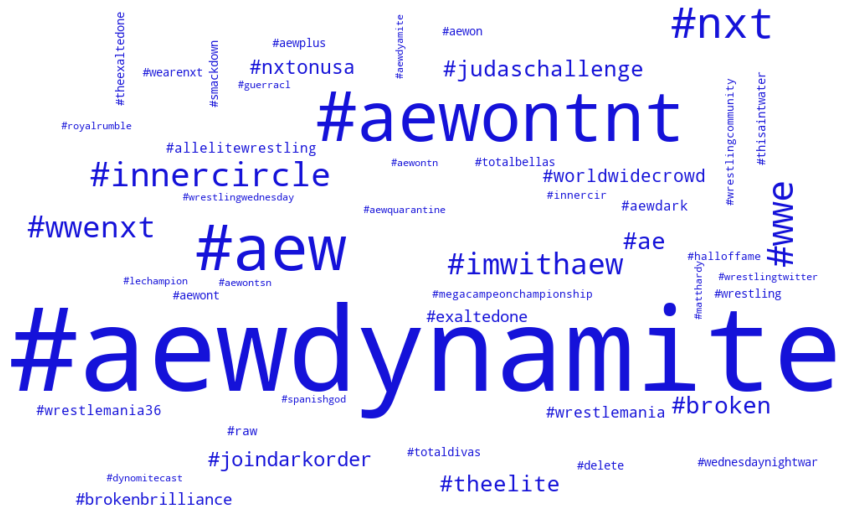

In [26]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(241, 85%, 46%)")

#Make a wordcloud plot of the most used hashtags
tuples = [tuple(x) for x in fd.values]
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# plt.savefig('images/most_frequent_hashtags_cloud.png')
plt.show()

In [27]:
# Find most mentioned accounts 
# mentions_df = tweets_df[tweets_df['was_retweet_id']==''] #tweets that are not retweets
# mentions_df = mentions_df[mentions_df['in_reply_to']==''] #tweets that are not responses
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_0-9]+")
mention_matches = list(tweets_df['text'].apply(mention_pattern.findall))
mentioned_accounts = []
for match in mention_matches:
    for word in match:
        mentioned_accounts.append(word.lower())
fdist = FreqDist(mentioned_accounts)
fd = pd.DataFrame(fdist.most_common(50), columns = ["Value","Frequency"])
fd['Link'] = fd['Value'].apply(lambda x: "<a href=\"http://www.twitter.com/" 
                                 + re.sub(r"\@", "", str(x)) + "\">" + str(x) + "</a>")
fig = go.Figure(
    data=go.Table(header=dict(
        values=['Uaername', 'Frequency']),
        cells=dict(values=[fd["Link"], fd["Frequency"]])
    ))
    
fig.update_layout(
    title_text = 'Top 50 Most Mentioned Accounts',
)
fig.show()

In [45]:
# Number of mentions for a particular username
# user_name = "@thisbrodielee" 
user_name = "@aewontnt"
mentioned_values = pd.concat([tweets_df['created_at'], tweets_df['text_lower'].apply(mention_pattern.findall)], axis=1, keys=['created_at', 'values'])
mentioned_values = mentioned_values.explode('values')
mentioned = mentioned_values.groupby('values')
item = mentioned.get_group(user_name.lower()) 
total = item.groupby(pd.Grouper(key='created_at', freq='1min')).count().reset_index()
total = total.rename(columns={"values": "Num of Mentions", "created_at":"Time in CST"})  
time_series = total["Time in CST"].reset_index(drop=True)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=time_series,
    y=total["Num of Mentions"],
    name="Total",
    opacity=0.8)
)

fig.update_layout(
    title="Number of Mentions of {} over time".format(user_name),
    xaxis_title="Time in CST",
    yaxis_title="Frequency",
#     xaxis  = go.layout.XAxis( range = ['2020-03-25 17:00:00-05:00', '2020-03-25 20:00:00-05:00']),
)
fig.show()

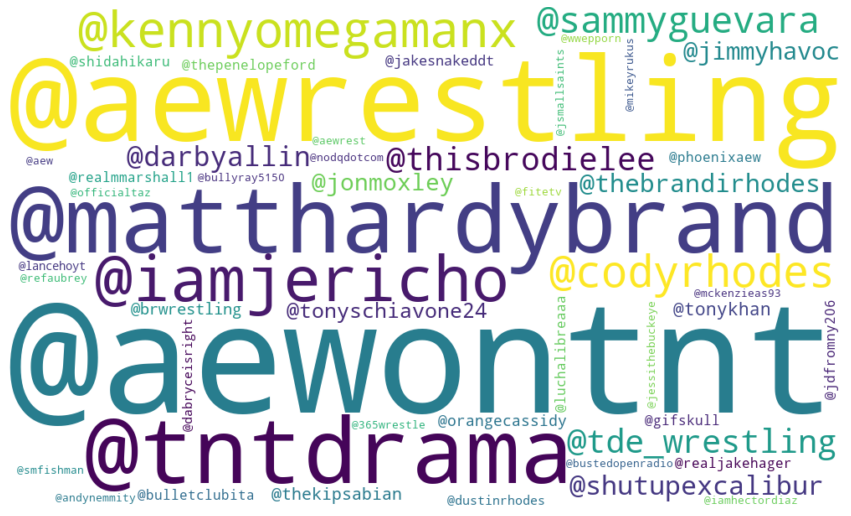

In [29]:
#Make a wordcloud representation
tuples = [tuple(x) for x in fd[['Value','Frequency']].values]
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
# Most retweeted tweets
retweeted_tweets = tweets_df[tweets_df['was_retweet_id']!='']
retweeted_tweets = retweeted_tweets['was_retweet_id']
fdist = FreqDist(retweeted_tweets)
fd = pd.DataFrame(fdist.most_common(20), columns = ["Tweet id","Frequency"])
retweeted_tweets_links = []
# fd['url'] = fd['Tweet id'].apply(lambda x: "http://www.twitter.com/user/status/" + str(x))
fd['Link'] = fd['Tweet id'].apply(lambda x: "<a href=\"http://www.twitter.com/user/status/" + str(x) + "\">" + str(x) + "</a>")

In [31]:
fd.to_csv("output/top 20 retweeted frequency.csv", index=False)
# Generate HTML for table
# print("<table class=\"table table-striped table-bordered\">")
# print("<thead>\n<tr>\n<th scope=\"col\">Tweet ID</th>")
# print("<th scope=\"col\">Frequency</th>\n</tr>\n</thead>")
# print("<tbody>")
# top = fd.head(10)
# for index, row in top.iterrows():
#     line = "<tr><td>@" + row['Link'] + "</td><td>" + str(row['Frequency']) + "</td></tr>"
#     print(line)
# print("</tbody>")
# print("</table")

In [32]:
fig = go.Figure(
    data=go.Table(header=dict(
        values=['Tweet ID', 'Frequency']),
        cells=dict(values=[fd["Link"], fd["Frequency"]])
    ))
    
fig.update_layout(
    title_text = 'Top 20 Most Retweeted Tweets',
)
# fig.write_image("images/most_retweeted_tweets.png", width=900, height=650)
fig.show()

In [33]:
# Most retweeted accounts
retweeted_accounts = tweets_df[tweets_df['was_retweet_user']!='']
retweeted_accounts = retweeted_accounts['was_retweet_user']
retweeted_accounts
fdist = FreqDist(retweeted_accounts)
fd = pd.DataFrame(fdist.most_common(50), columns = ["Username","Frequency"])
# trace = go.Bar(x=fd["Word"], y=fd["Frequency"], name="Freq Dist")
# fig = go.Figure(trace)
# fig.update_layout(
#     title="Most Retweeted Accounts",
#     xaxis_title="Username",
#     yaxis_title="Frequency",
# )
# fig.show()
fig = go.Figure(
    data=go.Table(header=dict(
        values=['Username', 'Frequency']),
        cells=dict(values=[fd["Username"], fd["Frequency"]])
    ))
    
fig.update_layout(
    title_text = 'Top 50 Most Retweeted Accounts',
)
# fig.write_image("images/most_retweeted_accounts_table.png",width=900, height=650)
fig.show()

In [34]:
fd.to_csv("output/top 50 retweeted users frequency.csv", index=False)
# Generate HTML for table
# print("<table class=\"table table-striped table-bordered\">")
# print("<thead>\n<tr>\n<th scope=\"col\">Username</th>")
# print("<th scope=\"col\">Frequency</th>\n</tr>\n</thead>")
# print("<tbody>")
# top = fd.head(10)
# for index, row in top.iterrows():
#     line = "<tr><td>@" + row['Username'] + "</td><td>" + str(row['Frequency']) + "</td></tr>"
#     print(line)
# print("</tbody>")
# print("</table")

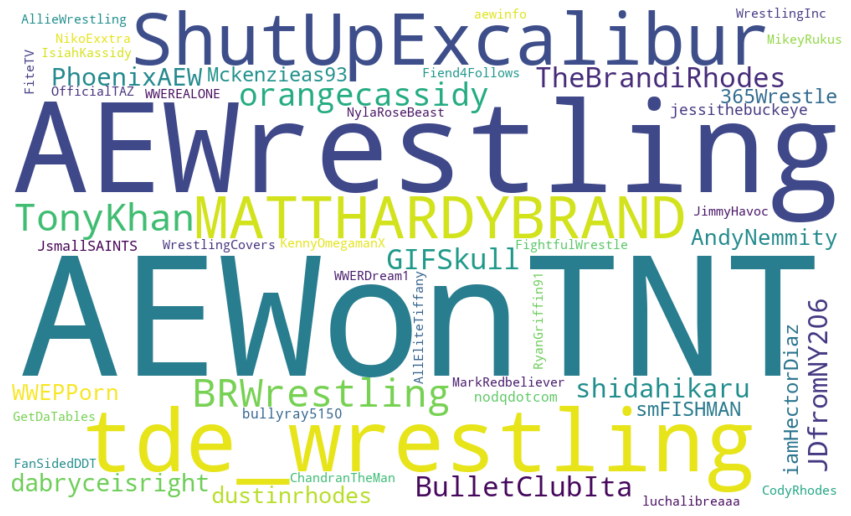

In [35]:
#Make a wordcloud plot of the most retweeted accounts
tuples = [tuple(x) for x in fd.values]
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# plt.savefig('images/most_retweeted_accounts_cloud.png')
plt.show()

In [36]:
# from nltk.probability import FreqDist
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# content = ' '.join(tweets_df["text"])
# content = re.sub(r"http\S+", "", content)
# content = content.replace('RT ', ' ').replace('&amp;', 'and')
# content = re.sub('[^A-Za-z0-9]+', ' ', content)
# content = content.lower()

# tokenized_word = word_tokenize(content)
# bigrams = nltk.trigrams(tokenized_word)
# stop_words=set(stopwords.words("english"))
# filtered_sent=[]
# for tup in bigrams:
#     if tup[0] not in stop_words and tup[1] not in stop_words and tup[2] not in stop_words:
#         filtered_sent.append(tup)
# fdist = FreqDist(filtered_sent)
# fd = pd.DataFrame(fdist.most_common(50), columns = ["Phrase","Frequency"])
# fd

In [37]:
# Top 50 users with most tweets
# user_tweets = tweets_df.groupby('user_name').count()
# user_tweets = user_tweets.rename(columns={"text":"count"}).reset_index()
# fd = user_tweets[["user_name","count"]].sort_values(by=['count'], ascending=False).head(50)
# fig = go.Figure(
#     data=go.Table(header=dict(
#         values=['Username', 'Frequency']),
#         cells=dict(values=[fd["user_name"], fd["count"]])
#     ))
    
# fig.update_layout(
#     title_text = 'Top 50 Users with the Most Tweets',
# )
# fig.show()
#Make a wordcloud representation
# tuples = [tuple(x) for x in fd.values]
# wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [38]:
# from textblob import TextBlob 
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
# analyser = SentimentIntensityAnalyzer()
# subset = not_retweets_df
# # Compute sentiment values
# for key, value in subset.iterrows():
#     text = value['text']
# #     blob = TextBlob(text)
# #     sent = blob.sentiment
# #     subset.at[key,'polarity'] = sent.polarity
# #     subset.at[key,'subjectivity'] = sent.subjectivity
#     sent = analyser.polarity_scores(text)
#     #{'compound','neg','neu','pos'}
#     subset.at[key,'polarity'] = sent['compound']
# # 0.0 is very objective and 1.0 is very subjective
# # -1 is negative, 0 is neutural, 1 is positive
# print("Total number of positive tweets: {}".format(len(subset[subset['polarity']>0.05])))
# print("Total number of negative tweets: {}".format(len(subset[subset['polarity']<-0.05])))
# print("Total number of neutral tweets: {}".format(len(subset[subset['polarity']==0])))
# fig = go.Figure(data=[go.Histogram(x=subset[subset['polarity']!=0]['polarity'], 
#                                    histnorm='probability',     
#                                    xbins=dict(
#                                     start=-1,
#                                     end=1.0,
#                                     size=0.05
#                                 ),)])
# fig.show()